# Roteiro 1
Nesse notebook, vamos implementar um analisador de espectro digital. Os objetivos são 

* relacionar a fft de um sinal amostrado com a transformada de Fourier do sinal analógico correspondente.
* interpretar o significado dos componentes da fft
* prever as consequências de aliasing
* evitar as consequências de aliasing através de uma filtragem simples
* saber trabalhar com as consequências das simetrias da fft.

## Relatório
As questões do roteiro devem ser respondidas em um arquivo google docs e submetidas no google classroom. Anexe uma cópia dos códigos utilizados e um breve vídeo explicando o que foi feito.

Inicialmente, vamos carregar algumas bibliotecas de Python. As primeiras são meio básicas. A última serve para podermos ouvir arquivos de áudio diretamente no notebook.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd



# Frequências representadas e aliasing


### PARTE I

Após carregar os pacotes necessários e configurar os gráficos, vamos carregar e ouvir um sinal de áudio. 

**1.** Qual a maior frequência do sinal original que pode ser recuperada a partir do sinal amostrado? *(DICA: Apresente o código, o resultado da variável Fs e justifique sua resposta com base na teoria)*

**2.** O que ocorreu com as frequências do sinal analógico maiores do que esse valor máximo? *(DICA: Justifique essa questão com o embasamento teórico sobre a Teoria da Amostragem)*

In [ ]:
from scipy.io import wavfile

fs, som = wavfile.read('Grilo.wav')

ipd.Audio(som,rate=fs)

In [ ]:
pwd

'/content'

O vetor `som` acima é o resultado da amostragem do som do grilo. Este processo é ilustrado na figura abaixo. Inicialmente um microfone transforma o som em um sinal elétrico. Em seguida, ele passa por um conversor analógico digital, que produz a sequência de valores capturadas no vetor `som`.


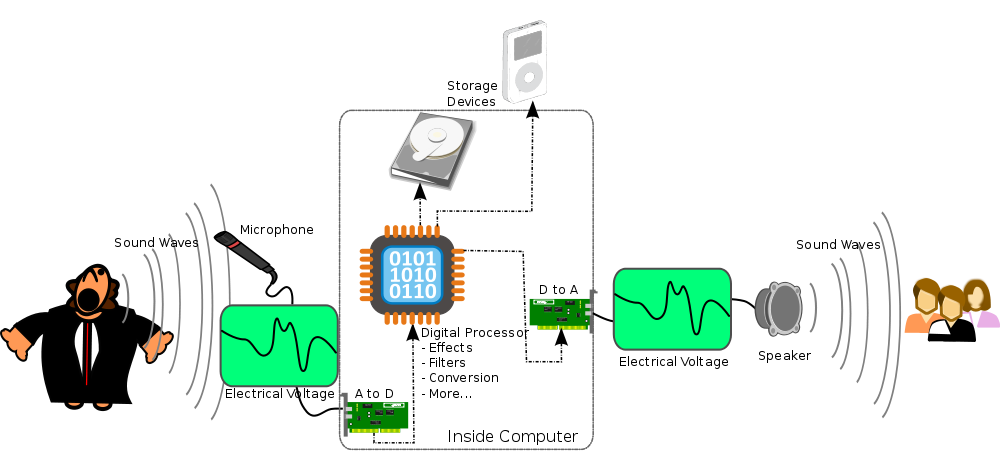



Após a amostragem, o sinal digital pode ser processado por um computador, celular, microcontrolador. Pode ser também armazenado ou transmitido digitalmente. Finalmente, para ouvir o sinal, como no comando `ip.Audio`acima, o sinal digital passa por um conversor digital-analógico, que o transforma novamente em um sinal analógico elétrico. Esse sinal é então colocado no alto-falante.

Os elementos do sinal digital, $s_d[n]$, são teoricamente iguais aos valores do sinal analógico nos instantes de amostragem. Ou seja

$$s_d[n] = s_c(t)|_{t = nT_s}$$
onde $T_s$ é o período de amstragem. A relação entre os sinais analógico e digital é ilustrada na figura abaixo:



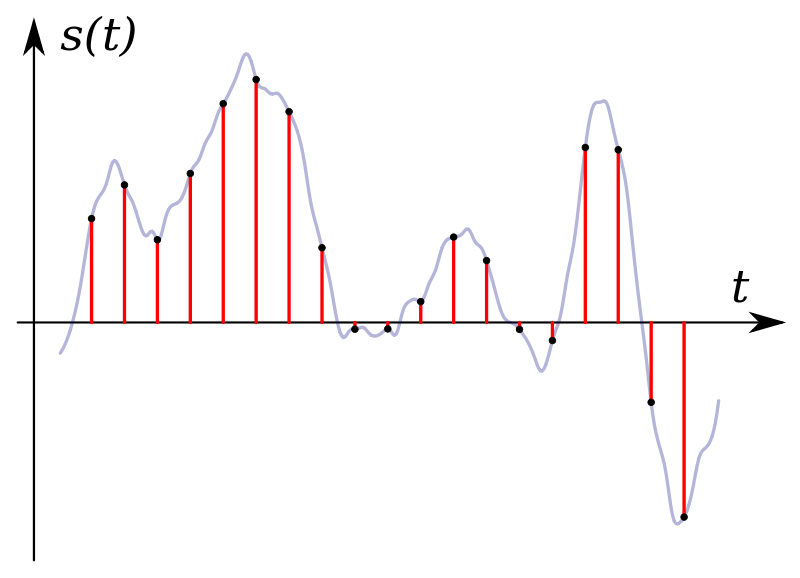


A seguir vamos mostrar os sete primeiros valores do sinal digital, para ilustrar bem o fato de que o sinal digital é um vetor, uma sequência de valores.

In [ ]:
som[:7]

Podemos também plotar o sinal de áudio. Observe que aqui temos apenas seus valores nos instantes de amostragem. Qualquer valor mostrado entre esses instantes são criados pelas rotinas gráficas que o matplotlib usa para gerar suas figuras. 

Observe também que cada amostra corresponde a $T_s = 1/ f_s$ segundos. Assim, para fazer o eixo x em segundos, devemos gerar um vetor de tempo adequado.

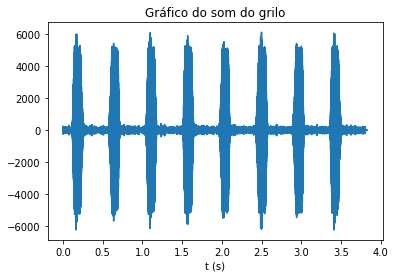

In [ ]:
t = np.arange(som.size)/fs
plt.plot(t,som);
plt.title('Gráfico do som do grilo')
plt.xlabel('t (s)');

Para ressaltar o fato de que o Python cria valores entre as amostras, vamos dar bastante zoom no gráfico, usando o comando `xlim`. E vamos sobrepor dois gráficos. Um deixando o matplotlib ter seu comportamento padrão, unindo valores adjacentes, outro obrigando o matplotlib a mostrar círculos vermelhos apenas nos instantes onde há amostras.

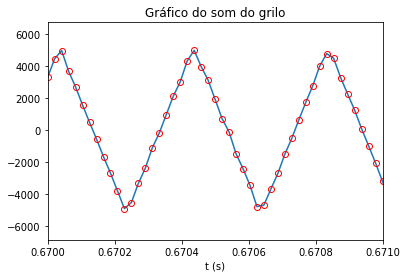

In [ ]:
t = np.arange(som.size)/fs
plt.plot(t,som);
plt.plot(t,som,'ro',fillstyle = 'none')
plt.title('Gráfico do som do grilo')
plt.xlabel('t (s)');
plt.xlim((0.67,0.671));

### PARTE II

**3.** Gere agora o espectro do sinal, colocando as frequências analógicas, em Hz, no eixo x. *(DICA: O comando fft() no Matlab calcula, de forma computacionalmente eficiente, a DFT de um sinal, de modo que podemos escrever algo como Y = fft(y). Atenção: o Matlab começa um vetor com o índice 1 e não 0! Esse cuidado com os índices não é necessário em Python.
Trace seu gráfico, usando o comando plot, de forma a ressaltar os componentes em frequência mais relevantes. Observe que o vetor gerado é complexo. Para ver como determinar a relevância de um componente a partir desse número complexo, por favor, veja a interpretação da transformada de Fourier para sinais reais mostrada na parte inicial do pdf que acompanha este experimento)*

**4.** Mostre no relatório a figura gerada, identificando onde estão as frequências negativas, e onde podem ser observadas as simetrias que surgem devido ao fato de que o sinal de áudio é real. *(DICA: Justifique essa questão com o embasamento teórico sobre a Teoria da Amostragem)*

**5.** Observe que o sinal tem 2 grupos principais de frequência, considerando as frequências positivas. Grupo aqui significa um conjunto contíguo de frequências não nulas, separadas por uma faixa de frequências nulas.
* Identifique a principal frequência de cada grupo, dando a resposta em Hz. 
Em outras palavras, você vai identificar quais são as duas principais frequências presentes no sinal analógico original, que foi amostrado para gerar o sinal de áudio com que estamos trabalhando. Essa etapa pode ser feita na força bruta, plotando só as partes relevantes do gráfico, usando `plt.xlim` em Python ou `xlim` em Matlab.

### PARTE III

Vamos agora tomar as amostras do sinal de áudio de nove em nove. Reproduza esse áudio. Você tem que atentar para a frequência de amostragem que você vai passar para o reprodutor de áudio. 

**6.** A operação de pegar as amostras de 9 em 9 corresponde a amostrar o sinal analógico original a que taxa?

In [ ]:
subamostrado = som[::9]

ipd.Audio(subamostrado,rate=int(fs_nova))

* Mostre no relatório o valor da nova frequência de amostragem, e quais frequências do sinal original são bem reproduzidas no novo sinal, e quais sofrem aliasing. *(DICA: Apresente o cálculo e justifique sua resposta com base na teoria)*

**7.** Compare a DFT do sinal subamostrado com a DFT do sinal original, mostrando neste último gráfico apenas as frequências que deveriam ser bem representadas no sinal subamostrado. Destaque algum ponto onde o fenômeno de aliasing seja evidente. *(DICA: Apresente ambos os gráficos e utilize recursos de zoom para apoiar sua resposta. Normalize os dois gráficos para facilitar a compração entre eles.)*

### PARTE IV

**8.** Para eliminar o aliasing, podemos passar o sinal por um filtro passa baixas antes de fazer a subamostragem. Vamos aqui fazer algo diferente: vamos eliminar diretamente os componentes em frequência que sofrerão aliasing. 
* Para fazer isso, gere primeiramente a DFT do sinal original, e zere todas as frequências que sofrerão aliasing. Para isso você pode usar um comando do tipo `DFT[K_inicial:K_final] = 0`. 
* Recupere agora o sinal no tempo através da DFT inversa, e depois faça a subamostragem. 

Lembre-se que o resultado deve ser real, portanto quando uma frequência for zerada, a componente na frequência negativa correspondente também deve ser zerada. Mesmo com esse cuidado, o sinal final terá um pequeno componente imaginário, por questões numéricas. Se esse componente for muito pequeno, da ordem de $10^{-12}$, isso significa que você fez tudo certo. Nesse caso, essa parte imaginária desprezível deve ser eliminada tomando apenas a parte real do sinal.

* No relatório, mostre os valores de K_inicial e K_final que você usou para zerar as frequências, com uma breve explicação de como esses valores foram obtidos.

*(DICA: Utilize os valores de frequência que são bem representados a essa taxa de amostragem e as relações Ω, w, f e k para encontrar os valores de K_inicial e K_final)*

**9.** Compare também os gráficos das DFTs do novo sinal subamostrado e do sinal original, novamente mostrando, neste último gráfico, apenas as frequências que deveriam ser bem representadas no sinal subamostrado. *(DICA: Apresente ambos os gráficos e utilize recursos de zoom para apoiar sua resposta)*

**10.** Ouça os dois sinais subamostrados, com e sem filtro anti-aliasing, para observar o impacto da filtragem anti-aliasing. A diferença nesse caso é sutil, sem um bom fone de ouvido será difícil perceber. *(DICA: Comente sobre as diferenças entre os áudios e sobre a necessidade de subamostrar um sinal e de utilizar um filtro anti-aliasing)*